In [1]:
# Import panda libraries
import pandas as pd

In [2]:
# Load the dataset
leadscoredata = pd.DataFrame(pd.read_excel('C:/Users/jsriv/Downloads/Data_Science_Internship.xlsx', sheet_name='Dump'))
leadscoredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Agent_id        46608 non-null  object        
 1   status          46608 non-null  object        
 2   lost_reason     43244 non-null  object        
 3   budget          42908 non-null  object        
 4   lease           44267 non-null  object        
 5   movein          32970 non-null  datetime64[ns]
 6   source          46608 non-null  object        
 7   source_city     46608 non-null  object        
 8   source_country  46608 non-null  object        
 9   utm_source      46608 non-null  object        
 10  utm_medium      46608 non-null  object        
 11  des_city        46608 non-null  object        
 12  des_country     46608 non-null  object        
 13  room_type       23061 non-null  object        
 14  lead_id         46608 non-null  object        
dtypes:

In [25]:
leadscoredata.describe()

C:\Users\jsriv\AppData\Local\Temp\ipykernel_12008\3840899313.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  leadscoredata.describe()


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
count,46608,46608,43244,42908,44267,32970,46608,46608,46608,46608,46608,46608,46608,23061,46608
unique,120,6,30,1840,311,477,683,4336,186,35,64,220,15,5,30574
top,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,2022-09-10 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,e741bdc636f2e99f2f83b31a64ff4b6d07f2b6a182d1cc...
freq,8186,43244,8892,9862,11111,2453,19306,8851,18812,31125,31761,7361,42674,12477,2
first,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2024-09-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'lead_id':- Since it is unique id generated for each leads it will not have any bearing on the lead score.
'Agent_id':- Mapping agent id in our ML model will also not have any bearing on the lead score.
'lost_reason':- Lost reason is generated when the lead is lost so we can't use this parameter during prediction stage.

In [3]:
# Drop unnecessary columns
leadscoredata.drop(['lead_id', 'Agent_id','lost_reason'], axis=1, inplace=True)

In [4]:
# as instructed '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN which
#represnts missing values so replacing all such value swith blank
leadscoredata= leadscoredata.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', "")

Processing the movein date to extract year and month and dropping the original movein column


In [5]:
leadscoredata['movein_month'] = leadscoredata['movein'].dt.month
leadscoredata['movein_year'] = leadscoredata['movein'].dt.year
#droping the movein column  then
leadscoredata.drop(['movein'], axis=1, inplace=True)

In [6]:
leadscoredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          46608 non-null  object 
 1   budget          42908 non-null  object 
 2   lease           44267 non-null  object 
 3   source          46608 non-null  object 
 4   source_city     46608 non-null  object 
 5   source_country  46608 non-null  object 
 6   utm_source      46608 non-null  object 
 7   utm_medium      46608 non-null  object 
 8   des_city        46608 non-null  object 
 9   des_country     46608 non-null  object 
 10  room_type       23061 non-null  object 
 11  movein_month    32970 non-null  float64
 12  movein_year     32970 non-null  float64
dtypes: float64(2), object(11)
memory usage: 4.6+ MB


In [7]:
leadscoredata.shape

(46608, 13)

Repetitive data during training of a machine learning (ML) model can lead to overfitting. Overfitting occurs when a model learns to memorize the training data instead of generalizing patterns that can be applied to new, unseen data so checking the same

In [8]:
leadscoredata.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
46603    False
46604    False
46605     True
46606    False
46607    False
Length: 46608, dtype: bool

Duplicate value is not present

Convert the budget and lease columns into numerical values by removing any non-numeric characters.

In [9]:
#converting budget and lease into numerical column
import re
# Define regular expression pattern to extract numerical values
pattern = re.compile(r'(\d+)')

# Extract numerical values from budget and lease columns
leadscoredata['budget'] = leadscoredata['budget'].str.extract(pattern).astype(float)
leadscoredata['lease'] = leadscoredata['lease'].str.extract(pattern).astype(float)

# Output resulting dataframe
print(leadscoredata)

      status  budget  lease  \
0       LOST     NaN    NaN   
1       LOST     NaN    NaN   
2       LOST   121.0   40.0   
3       LOST     0.0    NaN   
4       LOST     NaN    NaN   
...      ...     ...    ...   
46603   LOST    60.0   50.0   
46604   LOST    60.0    8.0   
46605   LOST   241.0   40.0   
46606   LOST     NaN    NaN   
46607   LOST   181.0   40.0   

                                                  source  \
0                                                          
1                                                          
2      7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
3      ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...   
4                                                          
...                                                  ...   
46603                                                      
46604                                                      
46605  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
46606  d684761c17c11590f6e2

In [10]:
#calculating the null values
Null_rate=(leadscoredata.isnull().mean())*100
# sort the null counts in descending order
null_counts_sorted = Null_rate.sort_values(ascending=False)
# print the sorted null counts
print(null_counts_sorted)

room_type         50.521370
lease             48.023944
budget            33.401991
movein_month      29.261071
movein_year       29.261071
status             0.000000
source             0.000000
source_city        0.000000
source_country     0.000000
utm_source         0.000000
utm_medium         0.000000
des_city           0.000000
des_country        0.000000
dtype: float64


room_type, lease, budget, movein_month and movein_year has large null values. Dropping them all will result in loss of large amount of data. So doing further analysis to decide what to do with these variables

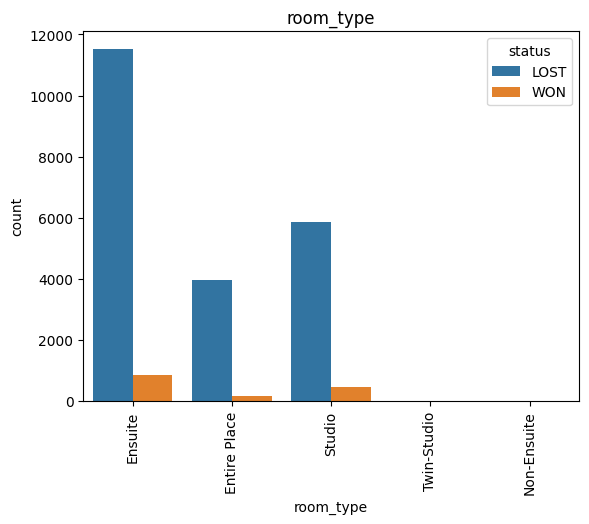

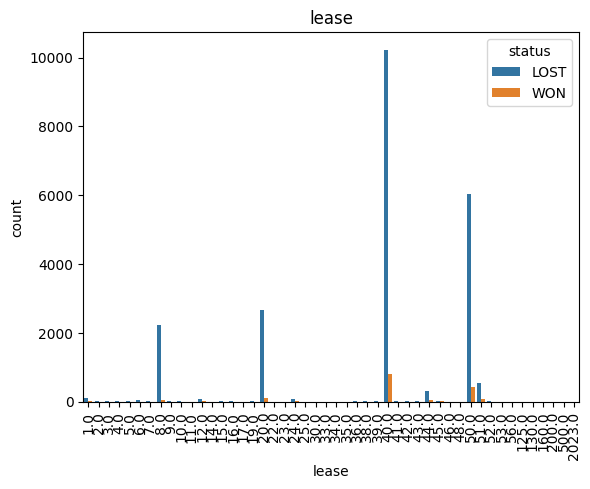

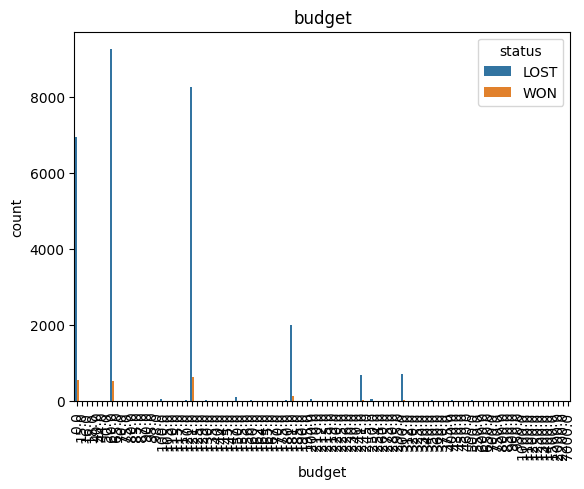

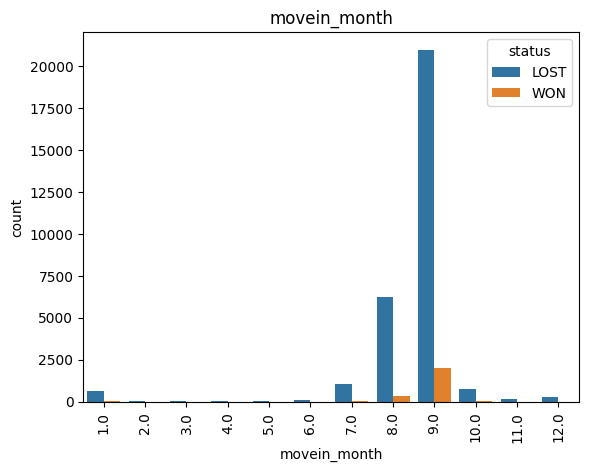

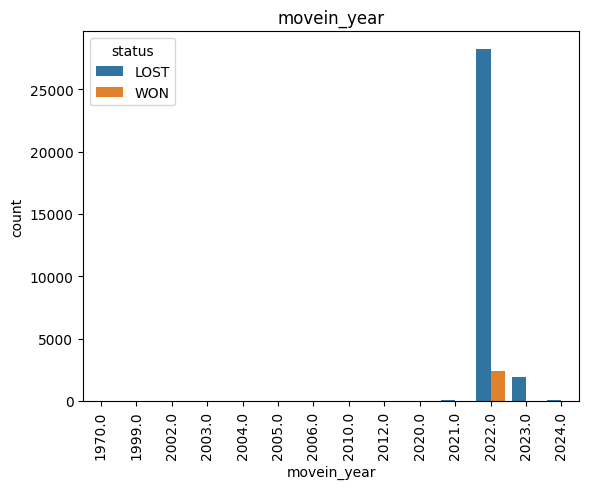

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new dataframe with only the relevant columns
df_plot = leadscoredata[['status', 'room_type', 'lease','budget','movein_month', 'movein_year']]

# Filter the dataframe to only include leads that are won or lost
df_plot = df_plot[df_plot['status'].isin(['WON', 'LOST'])]

# Loop through each column and create a bar plot showing the proportion of leads that are won or lost
for col in df_plot.columns[1:]:
    plt.figure()
    sns.countplot(x=col, hue='status', data=df_plot)
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()


In [13]:
#replacing the null values and then analysing the same

# Replace null values in the "room_type" column with "unknown"
leadscoredata["room_type"].fillna("unknown", inplace=True)


# Replace null values in the "movein_month" column with the median value
median_month = leadscoredata["movein_month"].median()
leadscoredata["movein_month"].fillna(median_month, inplace=True)

# Replace null values in the "movein_year" column with the median value
median_year = leadscoredata["movein_year"].median()
leadscoredata["movein_year"].fillna(median_year, inplace=True)
# replace null values in the budget and lease columns with their median values
median_budget = leadscoredata['budget'].median()
leadscoredata['budget'].fillna(median_budget, inplace=True)

median_lease = leadscoredata['lease'].median()
leadscoredata['lease'].fillna(median_lease, inplace=True)

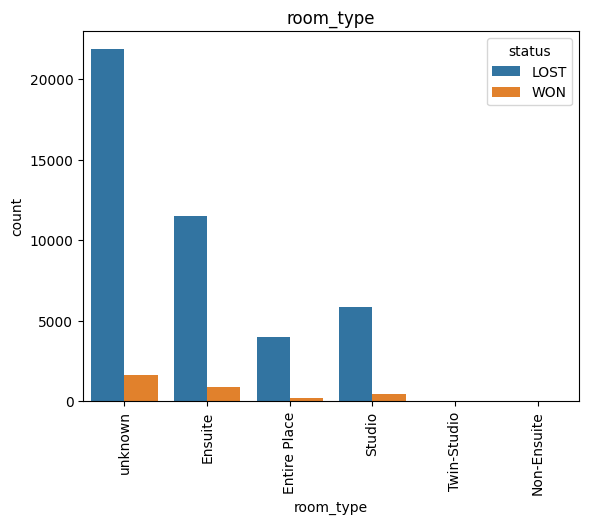

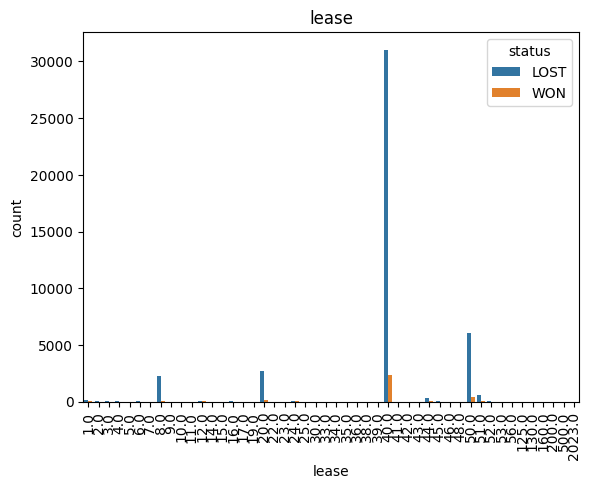

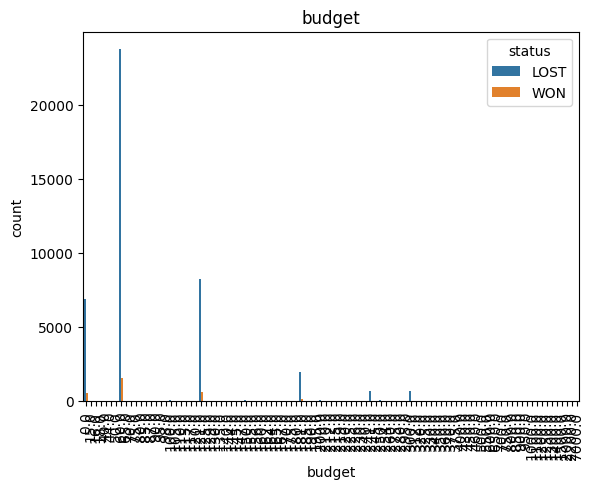

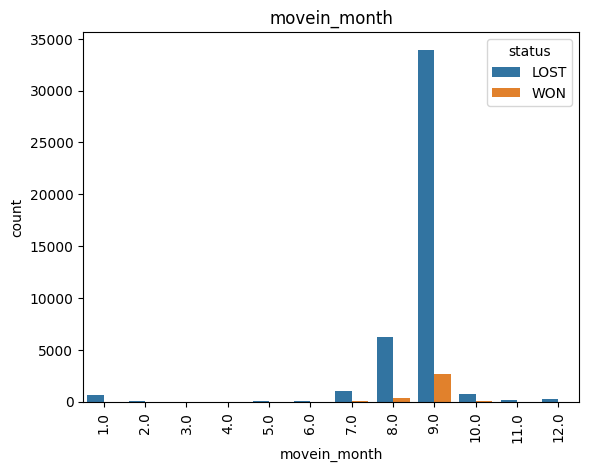

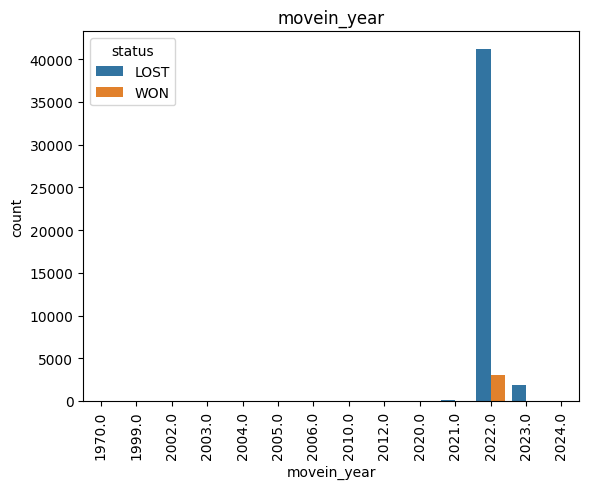

In [14]:
# Create a new dataframe with only the relevant columns
df_plot = leadscoredata[['status', 'room_type', 'lease','budget','movein_month', 'movein_year']]

# Filter the dataframe to only include leads that are won or lost
df_plot = df_plot[df_plot['status'].isin(['WON', 'LOST'])]

# Loop through each column and create a bar plot showing the proportion of leads that are won or lost
for col in df_plot.columns[1:]:
    plt.figure()
    sns.countplot(x=col, hue='status', data=df_plot)
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

In [15]:
#calculating the null values after the processing of data
leadscoredata.isnull().mean()

status            0.0
budget            0.0
lease             0.0
source            0.0
source_city       0.0
source_country    0.0
utm_source        0.0
utm_medium        0.0
des_city          0.0
des_country       0.0
room_type         0.0
movein_month      0.0
movein_year       0.0
dtype: float64

In [16]:
leadscoredata.shape

(46608, 13)

Now data is cleaned and has no null values
original shape of data was = (46608, 14)
after processing it is now= (46608, 14)
reduction_percent = (1 - 46608 / 46608) * 100
reduction_percent = 0%



In [17]:
# Filter the dataframe to include only rows where the status is "won" or "lost"
filtered_data = leadscoredata[(leadscoredata['status'] == 'WON') | (leadscoredata['status'] == 'LOST')]
# Print the filtered dataframe
print(filtered_data)

      status  budget  lease  \
0       LOST    60.0   40.0   
1       LOST    60.0   40.0   
2       LOST   121.0   40.0   
3       LOST     0.0   40.0   
4       LOST    60.0   40.0   
...      ...     ...    ...   
46603   LOST    60.0   50.0   
46604   LOST    60.0    8.0   
46605   LOST   241.0   40.0   
46606   LOST    60.0   40.0   
46607   LOST   181.0   40.0   

                                                  source  \
0                                                          
1                                                          
2      7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
3      ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...   
4                                                          
...                                                  ...   
46603                                                      
46604                                                      
46605  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
46606  d684761c17c11590f6e2

In [18]:
#checking the values for status column
filtered_data['status'].unique()

array(['LOST', 'WON'], dtype=object)

In [19]:
leadscoredata

,status,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,movein_month,movein_year
0,LOST,60.0,40.0,,,,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,unknown,9.0,2022.0
1,LOST,60.0,40.0,,,,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,unknown,9.0,2022.0
2,LOST,121.0,40.0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,8.0,2022.0
3,LOST,0.0,40.0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,unknown,9.0,2022.0
4,LOST,60.0,40.0,,,,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,,,unknown,9.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,LOST,60.0,50.0,,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,9.0,2022.0
46604,LOST,60.0,8.0,,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,9.0,2022.0
46605,LOST,241.0,40.0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,9.0,2022.0
46606,LOST,60.0,40.0,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f566706715d2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,unknown,8.0,2022.0


In [20]:
# convert categorical variables to dummy variables
filtered_data = pd.get_dummies(filtered_data)
filtered_data.columns

Index(['budget', 'lease', 'movein_month', 'movein_year', 'status_LOST',
       'status_WON', 'source_',
       'source_003f4f0b240c2adf7bba9dc34e7c14157c2d121be34f43858d32755aa8ce749b',
       'source_0060db974eb8e76c7b963b6ab1807d25abb793eba22ce2c26c18459c0178566d',
       'source_006e35a2127ef97a0a9f5143534d19042eab998d01095ec020623f7a00fe78c0',
       ...
       'des_country_abd149214539d9f222d25de6358735b9fa0efd3956f66102b2c119ae2d9f6348',
       'des_country_be55ef3f4c4e6c2d9c2afe2a33ac90ad0f50d4de7f9163999877e2a9ca5a54f8',
       'des_country_c1ef40ce0484c698eb4bd27fe56c1e7b68d74f9780ed674210d0e5013dae45e9',
       'des_country_dd64913c8b91d76ca27b371f0b86fd30452370469b8cadf4e5a61d41d14e42ec',
       'room_type_Ensuite', 'room_type_Entire Place', 'room_type_Non-Ensuite',
       'room_type_Studio', 'room_type_Twin-Studio', 'room_type_unknown'],
      dtype='object', length=5530)

Data cleaning is done moving further to create a lead score model using random forest algorithm.

In [21]:
#importing important libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# select the features and target variable
features = filtered_data.drop(['status_WON','status_LOST'], axis=1)
target = filtered_data['status_WON']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# create a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=150, random_state=42)

# fit the model to the training data
rfc.fit(X_train, y_train)

# predict the target variable for the testing set
y_pred = rfc.predict(X_test)

# calculate the lead score for the testing set
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
lead_score = [int(round(score * 100)) for score in y_pred_prob]
print('Lead Score:', lead_score)

# evaluate the model's performance using metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Lead Score: [0, 0, 11, 0, 35, 0, 0, 2, 3, 8, 5, 0, 24, 1, 0, 3, 0, 2, 2, 5, 29, 0, 0, 0, 1, 0, 17, 6, 3, 0, 1, 22, 25, 6, 3, 13, 3, 3, 45, 1, 1, 2, 2, 0, 3, 0, 18, 11, 8, 5, 1, 0, 0, 7, 20, 1, 11, 5, 18, 9, 0, 0, 0, 1, 2, 21, 8, 0, 1, 0, 23, 0, 2, 4, 0, 9, 33, 4, 0, 8, 0, 0, 17, 3, 4, 4, 7, 6, 13, 0, 26, 1, 13, 2, 6, 9, 0, 3, 4, 36, 6, 5, 4, 1, 0, 0, 5, 0, 0, 23, 0, 0, 0, 6, 4, 10, 14, 53, 0, 0, 3, 1, 0, 4, 0, 0, 2, 1, 14, 0, 0, 6, 3, 4, 1, 25, 1, 0, 6, 0, 2, 1, 0, 0, 0, 1, 3, 1, 4, 1, 43, 3, 5, 0, 5, 23, 0, 7, 0, 1, 0, 0, 7, 0, 1, 1, 6, 3, 1, 1, 0, 2, 1, 5, 13, 1, 9, 0, 1, 6, 2, 1, 1, 1, 3, 9, 1, 1, 1, 1, 1, 3, 1, 5, 12, 0, 2, 3, 17, 6, 0, 0, 32, 0, 18, 1, 10, 53, 15, 0, 3, 9, 4, 1, 5, 0, 7, 15, 16, 8, 6, 36, 0, 3, 75, 1, 0, 3, 1, 4, 2, 65, 1, 0, 0, 11, 8, 6, 0, 1, 11, 19, 5, 8, 7, 3, 7, 5, 0, 4, 8, 1, 0, 5, 0, 0, 3, 5, 9, 3, 1, 5, 0, 9, 1, 7, 0, 0, 24, 3, 1, 1, 0, 32, 0, 26, 1, 0, 5, 2, 10, 4, 4, 0, 9, 18, 28, 0, 0, 4, 55, 27, 3, 0, 0, 25, 2, 3, 11, 0, 0, 7, 0, 0, 3, 0, 3, 4, 17, 0, 

Accuracy: 0.934153713298791 means that the model correctly predicts 93.4% of the leads in the dataset, i.e., it correctly classifies a lead as either won or lost 93.4% of the time.

Precision: 0.41025641025641024 means that out of all the leads predicted as won by the model, only 41% of them are actually won leads, while the rest are false positives. In other words, the model is correctly identifying 41% of the won leads but is also misclassifying a large number of lost leads as won.

Recall: 0.10996563573883161 means that out of all the won leads in the dataset, the model correctly identifies only 10.99% of them, while the rest are false negatives. In other words, the model is missing out on a large number of true won leads.

F1-score: 0.1734417344173442 is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. A low F1-score indicates that either precision or recall (or both) is low.